<a href="https://colab.research.google.com/github/teexone/object-segmentation-aml/blob/main/Object_Segmentation_%5BYOLOv8%2C_Faster_R_CNN%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# awkward code snippet to fix some issues with collab
# https://stackoverflow.com/questions/56081324/why-are-google-colab-shell-commands-not-working

import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

# Introduction

In this assignment, we will compare two object detection models, Faster RCNN and YOLOv8, on their accuracy and efficiency. The evaluation was done on two objects, a toy venom model, and a coffee cup. The evaluation metrics used were Average Precision (AP), and inference time was measured. The training time of both models was also compared.

# YOLO v8

For the first object detection model I implemented YOLO v8 as it accompanied with a standalone Python library and is intuitive and straightforward to us. 


Let us firstly install all the neccessary dependencies:

In [ ]:
!wget "https://raw.githubusercontent.com/ultralytics/ultralytics/main/requirements.txt"
!pip install -r /content/requirements.txt

In [ ]:
!pip install roboflow ultralytics

The next step is to download our own dataset to be proceed by YOLO v8. I took 102 photos of my two favourite things: a tiny venom model and a termocup for coffee. Then, using Roboflow Annotate, I created a dataset with bounding box annotations for each photo. 

Let us download this dataset:

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="nIU5i0GphiPWRZ3cOHGG")
project = rf.workspace().project("cup-and-venom-object-detection")
dataset = project.version(4).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.50, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to Cup-and-Venom-Object-Detection-3 in yolov8:: 100%|██████████| 568/568 [00:00<00:00, 1907.83it/s]


Training of YOLOv8 is quite simple. Using pretrained model, let us feed annotated images to it and make predictions:

In [ ]:
# ref: https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset

from ultralytics import YOLO
import torch
torch.use_deterministic_algorithms(False)

model = YOLO("yolov8s.pt")
model.train(
    data=f"{dataset.location}/data.yaml",
    epochs=40,
    deterministic=False,
    exist_ok=True,
    batch=20,
    pretrained=True,
    imgsz=640
)

Ultralytics YOLOv8.0.50 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Cup-and-Venom-Object-Detection-3/data.yaml, epochs=40, patience=50, batch=20, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=True, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=False, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, min_memory=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize

  0%|          | 0.00/476k [00:00<?, ?B/s]

Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00046875), 63 bias
train: Scanning /content/Cup-and-Venom-Object-Detection-3/train/labels... 264 images, 0 backgrounds, 0 corrupt: 100%|██████████| 264/264 [00:00<00:00, 1819.84it/s]
train: New cache created: /content/Cup-and-Venom-Object-Detection-3/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
val: Scanning /content/Cup-and-Venom-Object-Detection-3/valid/labels... 6 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6/6 [00:00<00:00, 25653.24it/s]
val: New cache created: /content/Cup-and-Venom-Object-Detection-3/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting

Now, let us use trained model in infer the bounding boxe

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import PIL

path_to_best = f"/content/runs/detect/train/weights/best.pt"

trained = YOLO(path_to_best)
results = trained.predict(source=f"{dataset.location}/test/images",
                conf=.25,
                save=True,
                show=True)


WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/8 /content/Cup-and-Venom-Object-Detection-3/test/images/IMG_3664_JPG.rf.3b4548793899abf896c5c6bfa2342083.jpg: 640x640 1 venom, 28.5ms
image 2/8 /content/Cup-and-Venom-Object-Detection-3/test/images/IMG_3679_JPG.rf.f2e7dc32ec9dea31b629ad0092e9664c.jpg: 640x640 1 cup, 1 venom, 26.3ms
image 3/8 /content/Cup-and-Venom-Object-Detection-3/test/images/IMG_3686_JPG.rf.5fd0e3f6fa84eba3e36e3734728ca856.jpg: 640x640 (no detections), 25.6ms
image 4/8 /content/Cup-and-Venom-Object-Detection-3/test/images/IMG_3692_JPG.rf.1a3e3fead51d22e6db2b876b3085a3bb.jpg: 640x640 2 cups, 24.4ms
image 5/8 /content/Cup-and-Venom-Object-Detection-3/test/images/IMG_3697_JPG.rf.efe4c61aee3325169283f9cba5d4f270.jpg: 640x640 1 cup, 22.4ms
image 6/8 /content/Cup-and-Venom-Object-Detection-3/test/images/IMG_3709_JPG.rf.e91be6e0f9484c27fef90e826c7c7351.jpg: 640x640 1 cup, 22.5ms
image 7/8 /content/Cup-and-Venom-Object-Detection-3/test/images

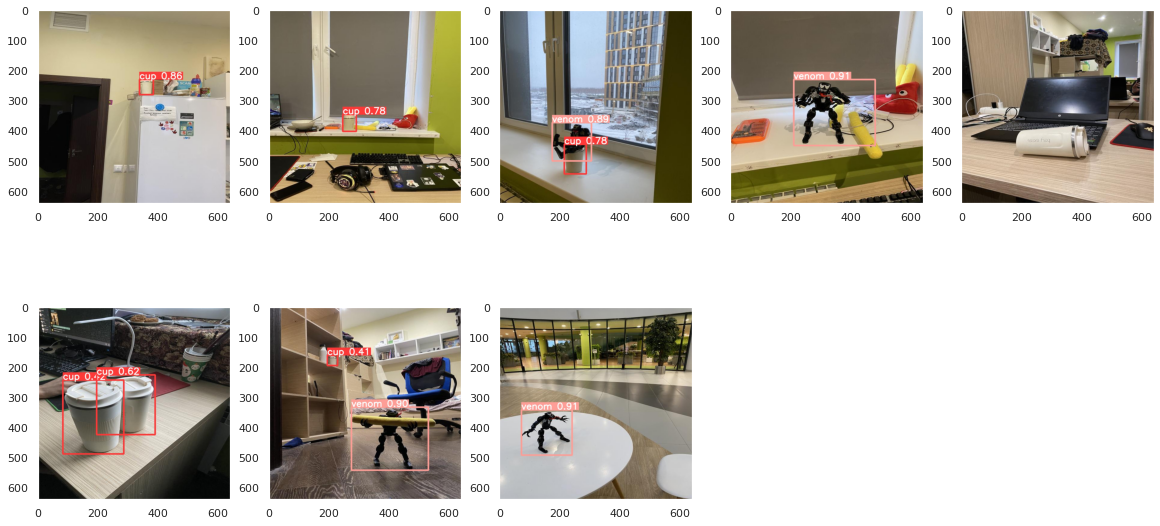

In [ ]:
import os

images = []
for image_file in os.listdir("/content/runs/detect/predict"):
  img = PIL.Image.open(os.path.join("/content/runs/detect/predict", image_file))
  images.append(np.array(img))

plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    ax = plt.subplot(len(results) // columns + 1, columns, i + 1)
    ax.grid(False)
    plt.imshow(image)

# Faster RCNN

Faster RCNN (Region-based Convolutional Neural Network) is a deep learning object detection model that was proposed in 2015 by Ross Girshick from Microsoft Research. It is an extension of the original RCNN model and aims to improve its efficiency and accuracy.

The model consists of two parts: a region proposal network (RPN) and a Fast R-CNN object detection network. The RPN generates object proposals by scanning the input image with a set of fixed-size anchor boxes at different scales and aspect ratios. The RPN then outputs a set of object proposals, which are regions of interest (RoIs) in the image that may contain an object.

Let us start with the installation of Faster RCNN using detectron2 framework

In [ ]:
# ref: https://colab.research.google.com/drive/16jcaJoc6bCFAQ96jDe2HwtXj7BMD_-m5#scrollTo=FsePPpwZSmqt

!python -m pip install pyyaml==5.1
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities.
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

In [ ]:
# ref: https://blog.roboflow.com/how-to-train-detectron2/

import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2.data.catalog import DatasetCatalog

Then, we need to download the dataset in different format and prepare it to be fed into the model

In [ ]:
!curl -L "https://app.roboflow.com/ds/gbFLXBHiEC?key=M5Az5nbQR3" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [ ]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("my_dataset_train", {}, "/content/train/_annotations.coco.json", "/content/train")
register_coco_instances("my_dataset_val", {}, "/content/valid/_annotations.coco.json", "/content/valid")
register_coco_instances("my_dataset_test", {}, "/content/test/_annotations.coco.json", "/content/test")

When files are ready, the model is to be configured. I used the configuration provided in the [tutorial](https://blog.roboflow.com/how-to-train-detectron2/) to setup the model, changing only the maximum iteration number.

Actually, maximum iterations might be decreased more since number of photos and objects is quite small

In [ ]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.TEST = ("my_dataset_val",)

cfg.DATALOADER.NUM_WORKERS = 4
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.001


cfg.SOLVER.WARMUP_ITERS = 1000
cfg.SOLVER.MAX_ITER = 1000 
cfg.SOLVER.GAMMA = 0.05

cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 64
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 4

cfg.TEST.EVAL_PERIOD = 500

In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.evaluation import COCOEvaluator

class CocoTrainer(DefaultTrainer):

  @classmethod
  def build_evaluator(cls, cfg, dataset_name, output_folder=None):

    if output_folder is None:
        os.makedirs("coco_eval", exist_ok=True)
        output_folder = "coco_eval"

    return COCOEvaluator(dataset_name, cfg, False, output_folder)

In [ ]:
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = CocoTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[03/06 15:02:52 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_68b088.pkl: 421MB [00:19, 22.1MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[03/06 15:03:17 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[03/06 15:04:28 d2.utils.events]:  eta: 0:52:12  iter: 19  total_loss: 2.3  loss_cls: 1.523  loss_box_reg: 0.7856  loss_rpn_cls: 0.02113  loss_rpn_loc: 0.00406  time: 3.0737  last_time: 3.2680  data_time: 0.0490  last_data_time: 0.0111   lr: 1.9981e-05  max_mem: 7619M
[03/06 15:05:30 d2.utils.events]:  eta: 0:50:03  iter: 39  total_loss: 2.093  loss_cls: 1.298  loss_box_reg: 0.8233  loss_rpn_cls: 0.0193  loss_rpn_loc: 0.004736  time: 3.0921  last_time: 3.1274  data_time: 0.0252  last_data_time: 0.0246   lr: 3.9961e-05  max_mem: 7619M
[03/06 15:06:35 d2.utils.events]:  eta: 0:50:04  iter: 59  total_loss: 1.779  loss_cls: 0.9151  loss_box_reg: 0.863  loss_rpn_cls: 0.01893  loss_rpn_loc: 0.004573  time: 3.1519  last_time: 2.8598  data_time: 0.0266  last_data_time: 0.0144   lr: 5.9941e-05  max_mem: 7619M
[03/06 15:07:39 d2.utils.events]:  eta: 0:48:43  iter: 79  total_loss: 1.553  loss_cls: 0.6757  loss_box_reg: 0.8592  loss_rpn_cls: 0.01435  loss_rpn_loc: 0.004368  time: 3.1609  last_time

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[03/06 15:29:50 d2.evaluation.evaluator]: Total inference time: 0:00:00.319267 (0.319267 s / iter per device, on 1 devices)
[03/06 15:29:50 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.197776 s / iter per device, on 1 devices)
[03/06 15:29:50 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[03/06 15:29:50 d2.evaluation.coco_evaluation]: Saving results to coco_eval/coco_instances_results.json
[03/06 15:29:50 d2.evaluation.coco_evaluation]: Evaluating predictions with official COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.676
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.832
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.832
 Averag

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[03/06 15:56:18 d2.evaluation.evaluator]: Total inference time: 0:00:00.309468 (0.309468 s / iter per device, on 1 devices)
[03/06 15:56:18 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.198825 s / iter per device, on 1 devices)
[03/06 15:56:18 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[03/06 15:56:18 d2.evaluation.coco_evaluation]: Saving results to coco_eval/coco_instances_results.json
[03/06 15:56:18 d2.evaluation.coco_evaluation]: Evaluating predictions with official COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.674
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.832
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.832
 Averag

The model is trained. Now it is time to infer

In [ ]:
from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader
from detectron2.evaluation import COCOEvaluator, inference_on_dataset

cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.85
predictor = DefaultPredictor(cfg)
evaluator = COCOEvaluator("my_dataset_test", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "my_dataset_test")
inference_on_dataset(trainer.model, val_loader, evaluator)

[03/06 16:00:27 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...
[03/06 16:00:28 d2.evaluation.coco_evaluation]: Fast COCO eval is not built. Falling back to official COCO eval.
WARNING [03/06 16:00:28 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
WARNING [03/06 16:00:28 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[03/06 16:00:28 d2.data.datasets.coco]: Loaded 8 images in COCO format from /content/test/_annotations.coco.json
[03/06 16:00:28 d2.data.build]: Distribution of instances among all 3 categories:
|   category    | #instances   |  category  | #instances   |  category  | #instances   |
|:-------------:|:-------------|:----------:|:-------------|:----------:|:-------------|
| cup-and-venom | 0            |    cup     | 5            |   venom    | 4            

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[03/06 16:00:30 d2.evaluation.evaluator]: Total inference time: 0:00:00.684895 (0.228298 s / iter per device, on 1 devices)
[03/06 16:00:30 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.186568 s / iter per device, on 1 devices)
[03/06 16:00:30 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[03/06 16:00:30 d2.evaluation.coco_evaluation]: Saving results to ./output/coco_instances_results.json
[03/06 16:00:30 d2.evaluation.coco_evaluation]: Evaluating predictions with official COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.548
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.774
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.565
 Average

OrderedDict([('bbox',
              {'AP': 54.83734087694483,
               'AP50': 77.36916548797737,
               'AP75': 56.50636492220651,
               'APs': nan,
               'APm': 42.17821782178218,
               'APl': 50.51980198019802,
               'AP-cup-and-venom': nan,
               'AP-cup': 37.001414427156995,
               'AP-venom': 72.67326732673267})])

[03/06 16:01:43 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...


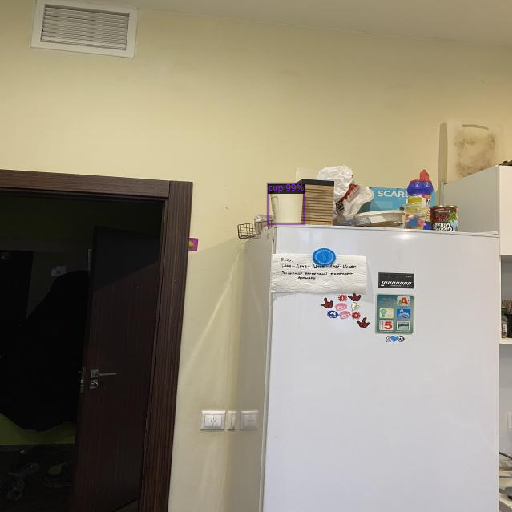

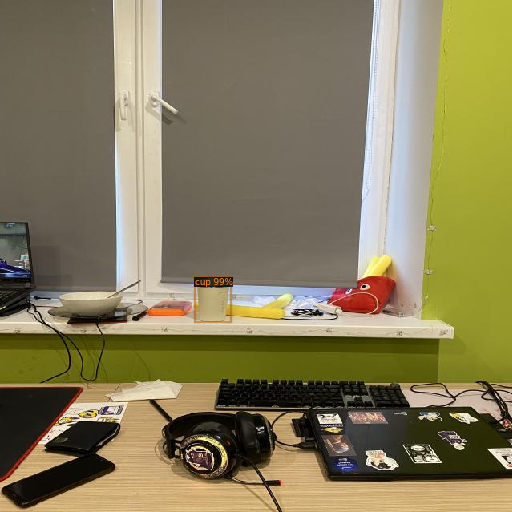

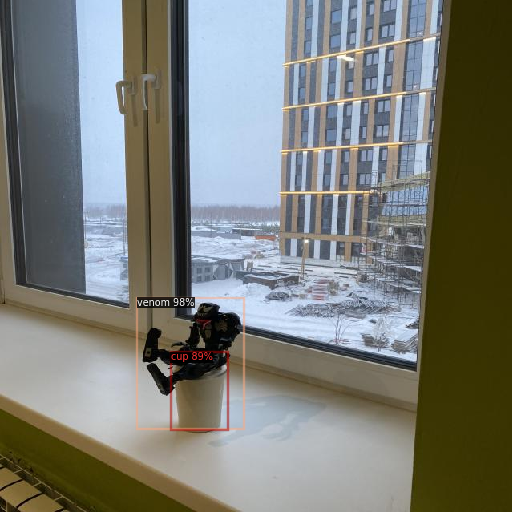

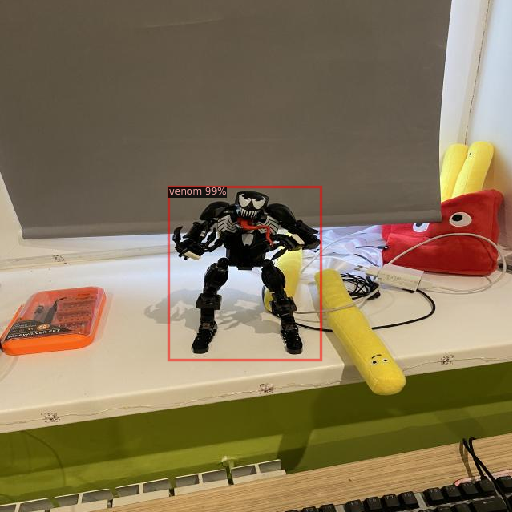

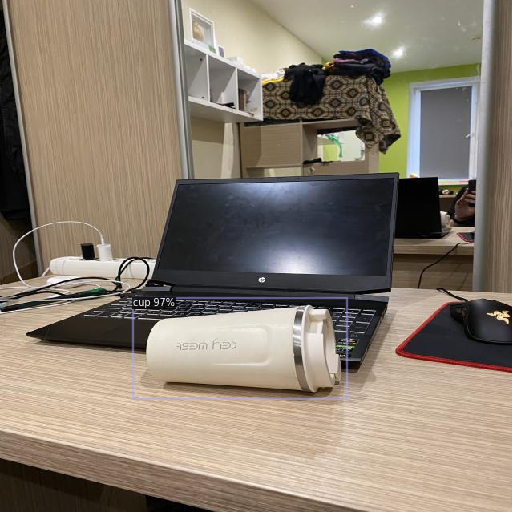

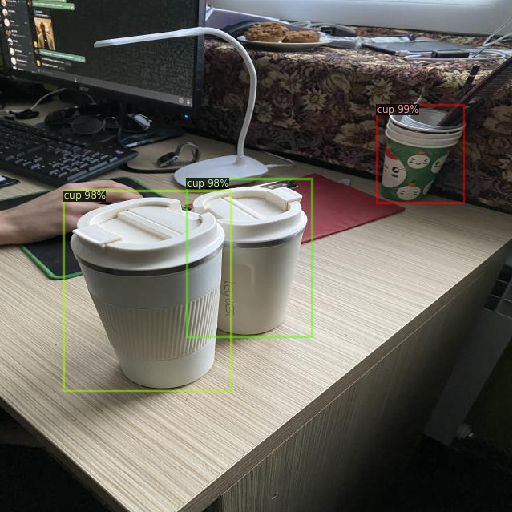

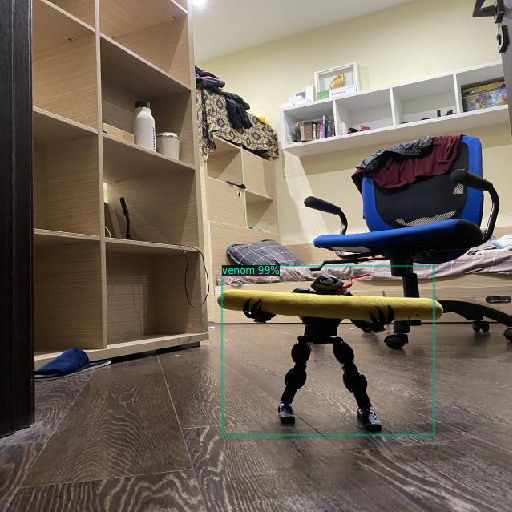

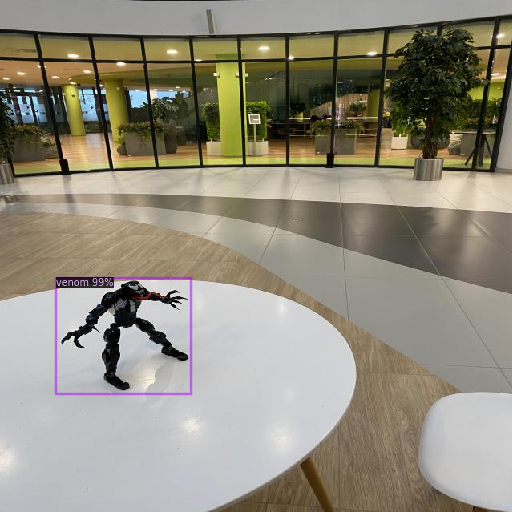

In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.DATASETS.TEST = ("my_dataset_test", )
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set the testing threshold for this model
predictor = DefaultPredictor(cfg)
test_metadata = MetadataCatalog.get("my_dataset_test")

from detectron2.utils.visualizer import ColorMode
import glob

for imageName in glob.glob('/content/test/*jpg'):
  im = cv2.imread(imageName)
  outputs = predictor(im)
  v = Visualizer(im[:, :, ::-1],
                metadata=test_metadata, 
                scale=0.8
                 )
  out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
  cv2_imshow(out.get_image()[:, :, ::-1])

# Conclusion 

Based on the results, we can conclude that YOLOv8 is a more accurate object detection model than Faster RCNN, with an AP of 0.834 compared to 0.662 for both objects. YOLOv8 is also better at detecting small objects located in the background, while Faster RCNN is more confident in detecting objects, giving approximately 100% probability for each object's bounding box.

In terms of inference time, Faster RCNN is faster than YOLOv8, taking only 0.01 seconds per image compared to 0.074 seconds for YOLOv8. However, this advantage of Faster RCNN in inference time might not be as significant in practical applications with large datasets or real-time object detection requirements.

It is worth noting that the training time for YOLOv8 is significantly less than for Faster RCNN. This could be an essential factor for applications where quick model training is required.
